In [3]:
# Load modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
# Load the dataset and do some remaining cleaning
pd.set_option('display.max_columns', None)
train_df = pd.read_csv('train_df_cleaned.csv')
train_df.drop(columns=['Unnamed: 0', 'id', 'PCIAT-PCIAT_Total'], inplace=True)
train_df.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_GSND,FGC-FGC_GSD,FGC-FGC_PU,FGC-FGC_SRL,FGC-FGC_SRR,FGC-FGC_TL,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
0,5,0,51.000000,16.878972,46.0,50.8,24.565675,61.2,84.4,107.8,0.0,12.90,12.62,0.0,7.0,6.0,6.0,36.521592,53.386029,3.0,2.0
1,9,0,63.225548,14.036968,48.0,46.0,22.000000,75.0,70.0,122.0,3.0,13.52,13.20,5.0,11.0,11.0,3.0,46.000000,64.000000,0.0,0.0
2,10,1,71.000000,16.650330,56.5,75.6,22.074960,65.0,94.0,117.0,20.0,10.20,14.70,7.0,10.0,10.0,5.0,38.000000,54.000000,2.0,0.0
3,9,0,71.000000,18.294143,56.0,81.6,24.331448,60.0,97.0,117.0,18.0,19.58,21.74,5.0,7.0,7.0,7.0,31.000000,45.000000,0.0,1.0
4,13,1,50.000000,22.282139,59.5,112.2,30.968808,60.0,73.0,102.0,12.0,16.50,17.90,6.0,10.0,11.0,8.0,40.000000,56.000000,0.0,1.0


In [5]:
# Make sure the encoding is correct
encoder = OrdinalEncoder(categories=[[0, 1, 2, 3]])
train_df['PreInt_EduHx-computerinternet_hoursday'] = encoder.fit_transform(
    train_df[['PreInt_EduHx-computerinternet_hoursday']]
)

encoder = OrdinalEncoder(categories=[[0, 1]])
train_df['Basic_Demos-Sex'] = encoder.fit_transform(
    train_df[['Basic_Demos-Sex']]
)

encoder = OrdinalEncoder(categories=[[0, 1, 2, 3]])
train_df['sii'] = encoder.fit_transform(
    train_df[['sii']]
)

train_df.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_GSND,FGC-FGC_GSD,FGC-FGC_PU,FGC-FGC_SRL,FGC-FGC_SRR,FGC-FGC_TL,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
0,5,0.0,51.000000,16.878972,46.0,50.8,24.565675,61.2,84.4,107.8,0.0,12.90,12.62,0.0,7.0,6.0,6.0,36.521592,53.386029,3.0,2.0
1,9,0.0,63.225548,14.036968,48.0,46.0,22.000000,75.0,70.0,122.0,3.0,13.52,13.20,5.0,11.0,11.0,3.0,46.000000,64.000000,0.0,0.0
2,10,1.0,71.000000,16.650330,56.5,75.6,22.074960,65.0,94.0,117.0,20.0,10.20,14.70,7.0,10.0,10.0,5.0,38.000000,54.000000,2.0,0.0
3,9,0.0,71.000000,18.294143,56.0,81.6,24.331448,60.0,97.0,117.0,18.0,19.58,21.74,5.0,7.0,7.0,7.0,31.000000,45.000000,0.0,1.0
4,13,1.0,50.000000,22.282139,59.5,112.2,30.968808,60.0,73.0,102.0,12.0,16.50,17.90,6.0,10.0,11.0,8.0,40.000000,56.000000,0.0,1.0


In [6]:
# Scaling continuous numerical columns
columns_to_scale = [
    'Basic_Demos-Age', 'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 
    'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-Systolic_BP', 'Physical-HeartRate',
    'FGC-FGC_CU', 'FGC-FGC_GSND', 'FGC-FGC_GSD', 'FGC-FGC_PU', 'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_TL',
    'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T'
]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_df[columns_to_scale])
scaled_df = pd.DataFrame(scaled_features, columns=columns_to_scale)

encoded_features = train_df[['Basic_Demos-Sex', 'PreInt_EduHx-computerinternet_hoursday', 'sii']]
final_df = pd.concat([scaled_df, encoded_features.reset_index(drop=True)], axis=1)
final_df.head()

,Basic_Demos-Age,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-Systolic_BP,Physical-HeartRate,FGC-FGC_CU,FGC-FGC_GSND,FGC-FGC_GSD,FGC-FGC_PU,FGC-FGC_SRL,FGC-FGC_SRR,FGC-FGC_TL,SDS-SDS_Total_Raw,SDS-SDS_Total_T,Basic_Demos-Sex,PreInt_EduHx-computerinternet_hoursday,sii
0,-1.529168,-1.195704,-0.488011,-1.336605,-0.937662,-0.479900,-0.638586,-0.546182,0.200983,-1.079409,-0.744701,-0.859724,-0.839383,-0.625255,-1.012482,-1.263306,-0.443877,-0.336535,0.0,3.0,2.0
1,-0.360892,-0.163207,-1.071287,-1.066940,-1.052512,-0.983451,0.419154,0.308091,-0.882957,-0.798274,-0.660725,-0.783093,-0.087724,0.805498,0.759342,-2.449659,0.482403,0.477692,0.0,0.0,0.0
2,-0.068823,0.493377,-0.534936,0.079136,-0.344275,-0.968739,-0.347324,0.007291,0.923609,0.794825,-1.110406,-0.584909,0.212940,0.447810,0.404977,-1.658757,-0.299400,-0.289436,1.0,2.0,0.0
3,-0.360892,0.493377,-0.197570,0.011720,-0.200713,-0.525870,-0.730563,0.007291,1.149430,0.607401,0.160078,0.345231,-0.087724,-0.625255,-0.658118,-0.867855,-0.983477,-0.979850,0.0,0.0,1.0
4,0.807384,-1.280158,0.620903,0.483634,0.531451,0.776808,-0.730563,-0.895110,-0.657136,0.045131,-0.257096,-0.162118,0.062608,0.447810,0.759342,-0.472404,-0.103949,-0.136010,1.0,0.0,1.0


In [7]:
# PCA for Dimensionality Reduction
pca_df = final_df.drop(columns=['sii']).copy()
pca = PCA()
pca_features = pca.fit_transform(pca_df)

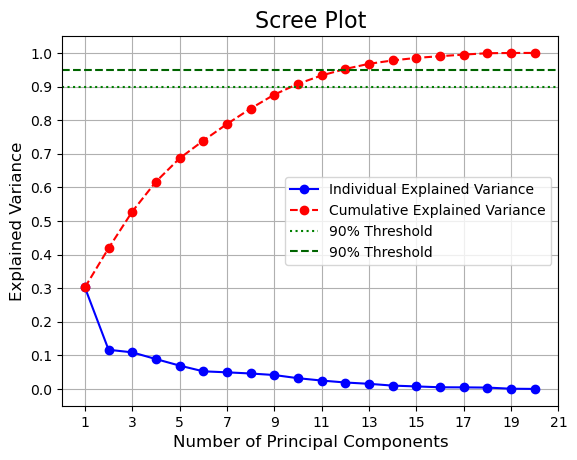

In [8]:

# Calculate individual explained variance and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Individual Variance Explained
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 
         marker='o', linestyle='-', color='blue', label='Individual Explained Variance')

# Cumulative Variance Explained
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, 
         marker='o', linestyle='--', color='red', label='Cumulative Explained Variance')

plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Explained Variance', fontsize=12)
plt.title('Scree Plot', fontsize=16)
plt.axhline(y=0.9, color='green', linestyle=':', label='90% Threshold')
plt.axhline(y=0.95, color='darkgreen', linestyle='--', label='90% Threshold')
plt.xticks([2*i + 1 for i in range(11)])
plt.yticks([i * 0.1 for i in range(11)])
plt.legend()
plt.grid(True)

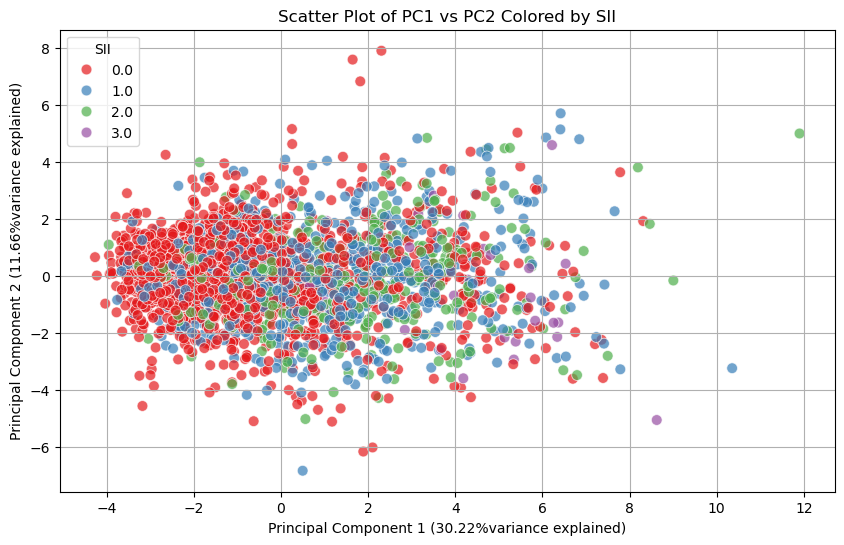

In [9]:
pca_df = pd.DataFrame(data=pca_features[:, :12], columns=[f'PC{i+1}' for i in range(12)])
pca_df['sii'] = train_df['sii']

# Plotting PC1 vs PC2 with different colors for each sii value
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2', hue='sii',
    palette='Set1', data=pca_df, alpha=0.7, s=60
)
plt.xlabel(f'Principal Component 1 ({explained_variance_ratio[0] * 100:.2f}%variance explained)')
plt.ylabel(f'Principal Component 2 ({explained_variance_ratio[1] * 100:.2f}%variance explained)')
plt.title('Scatter Plot of PC1 vs PC2 Colored by SII')
plt.legend(title='SII')
plt.grid(True)
plt.show()

Silhouette Score for K-Means Clustering: 0.122


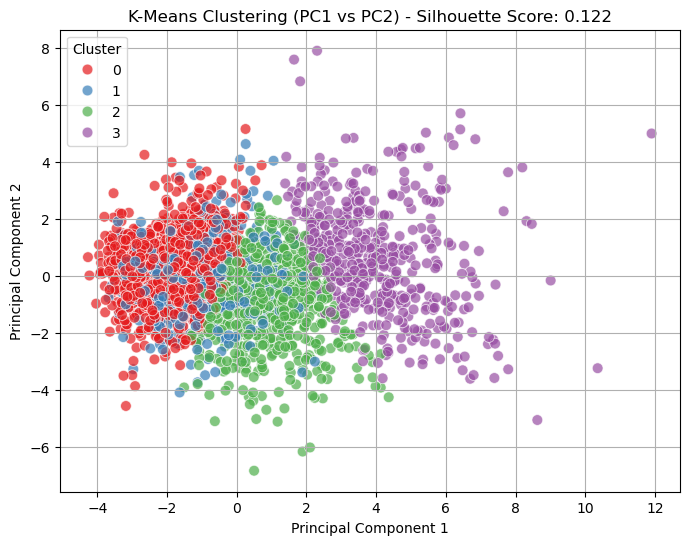

In [10]:
# Fit K-Means with optimal number of clusters (example: k=4 based on elbow point)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pca_df['kmeans_cluster'] = kmeans.fit_predict(pca_df.iloc[:, :11])

# Calculate Silhouette Score for K-Means
kmeans_silhouette_score = silhouette_score(pca_df.iloc[:, :11], pca_df['kmeans_cluster'])
print(f"Silhouette Score for K-Means Clustering: {kmeans_silhouette_score:.3f}")

# Plotting the clusters in PC1 vs PC2 space (K-Means)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PC1', y='PC2', hue='kmeans_cluster',
    palette='Set1', data=pca_df, alpha=0.7, s=60
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering (PC1 vs PC2) - Silhouette Score: {kmeans_silhouette_score:.3f}')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [11]:
train_df.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_GSND,FGC-FGC_GSD,FGC-FGC_PU,FGC-FGC_SRL,FGC-FGC_SRR,FGC-FGC_TL,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
0,5,0.0,51.000000,16.878972,46.0,50.8,24.565675,61.2,84.4,107.8,0.0,12.90,12.62,0.0,7.0,6.0,6.0,36.521592,53.386029,3.0,2.0
1,9,0.0,63.225548,14.036968,48.0,46.0,22.000000,75.0,70.0,122.0,3.0,13.52,13.20,5.0,11.0,11.0,3.0,46.000000,64.000000,0.0,0.0
2,10,1.0,71.000000,16.650330,56.5,75.6,22.074960,65.0,94.0,117.0,20.0,10.20,14.70,7.0,10.0,10.0,5.0,38.000000,54.000000,2.0,0.0
3,9,0.0,71.000000,18.294143,56.0,81.6,24.331448,60.0,97.0,117.0,18.0,19.58,21.74,5.0,7.0,7.0,7.0,31.000000,45.000000,0.0,1.0
4,13,1.0,50.000000,22.282139,59.5,112.2,30.968808,60.0,73.0,102.0,12.0,16.50,17.90,6.0,10.0,11.0,8.0,40.000000,56.000000,0.0,1.0


In [12]:
# Extract PCA loadings (weights)
pca_loadings = pca.components_[:12]
pca_loadings.shape

(12, 20)

In [13]:
pca_df.columns[:-2]

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12'],
      dtype='object')

In [14]:
# Create a DataFrame for the loadings with features as rows and PCs as columns
loadings_df = pd.DataFrame(
    pca_loadings.transpose(),
    columns=pca_df.columns[:-2],
)
loadings_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.360149,0.009770,-0.072965,-0.065485,0.010912,-0.049017,0.134907,-0.025817,0.031727,-0.167335,-0.436932,-0.248549
1,-0.025172,0.125157,-0.145176,0.049121,0.120291,0.676176,0.357139,0.453711,-0.376662,0.087706,-0.002463,-0.057873
2,0.291615,-0.188410,0.096814,0.163968,-0.354160,0.178874,-0.078342,0.031270,0.034309,-0.091626,0.411176,0.159605
3,0.365333,-0.022633,-0.074573,-0.060093,0.015961,0.010928,0.116647,-0.058709,0.049726,-0.176498,-0.431075,-0.252317
4,0.380912,-0.123999,0.018805,0.064427,-0.208648,0.111380,-0.011621,-0.006391,0.041286,-0.142906,-0.003800,-0.056100


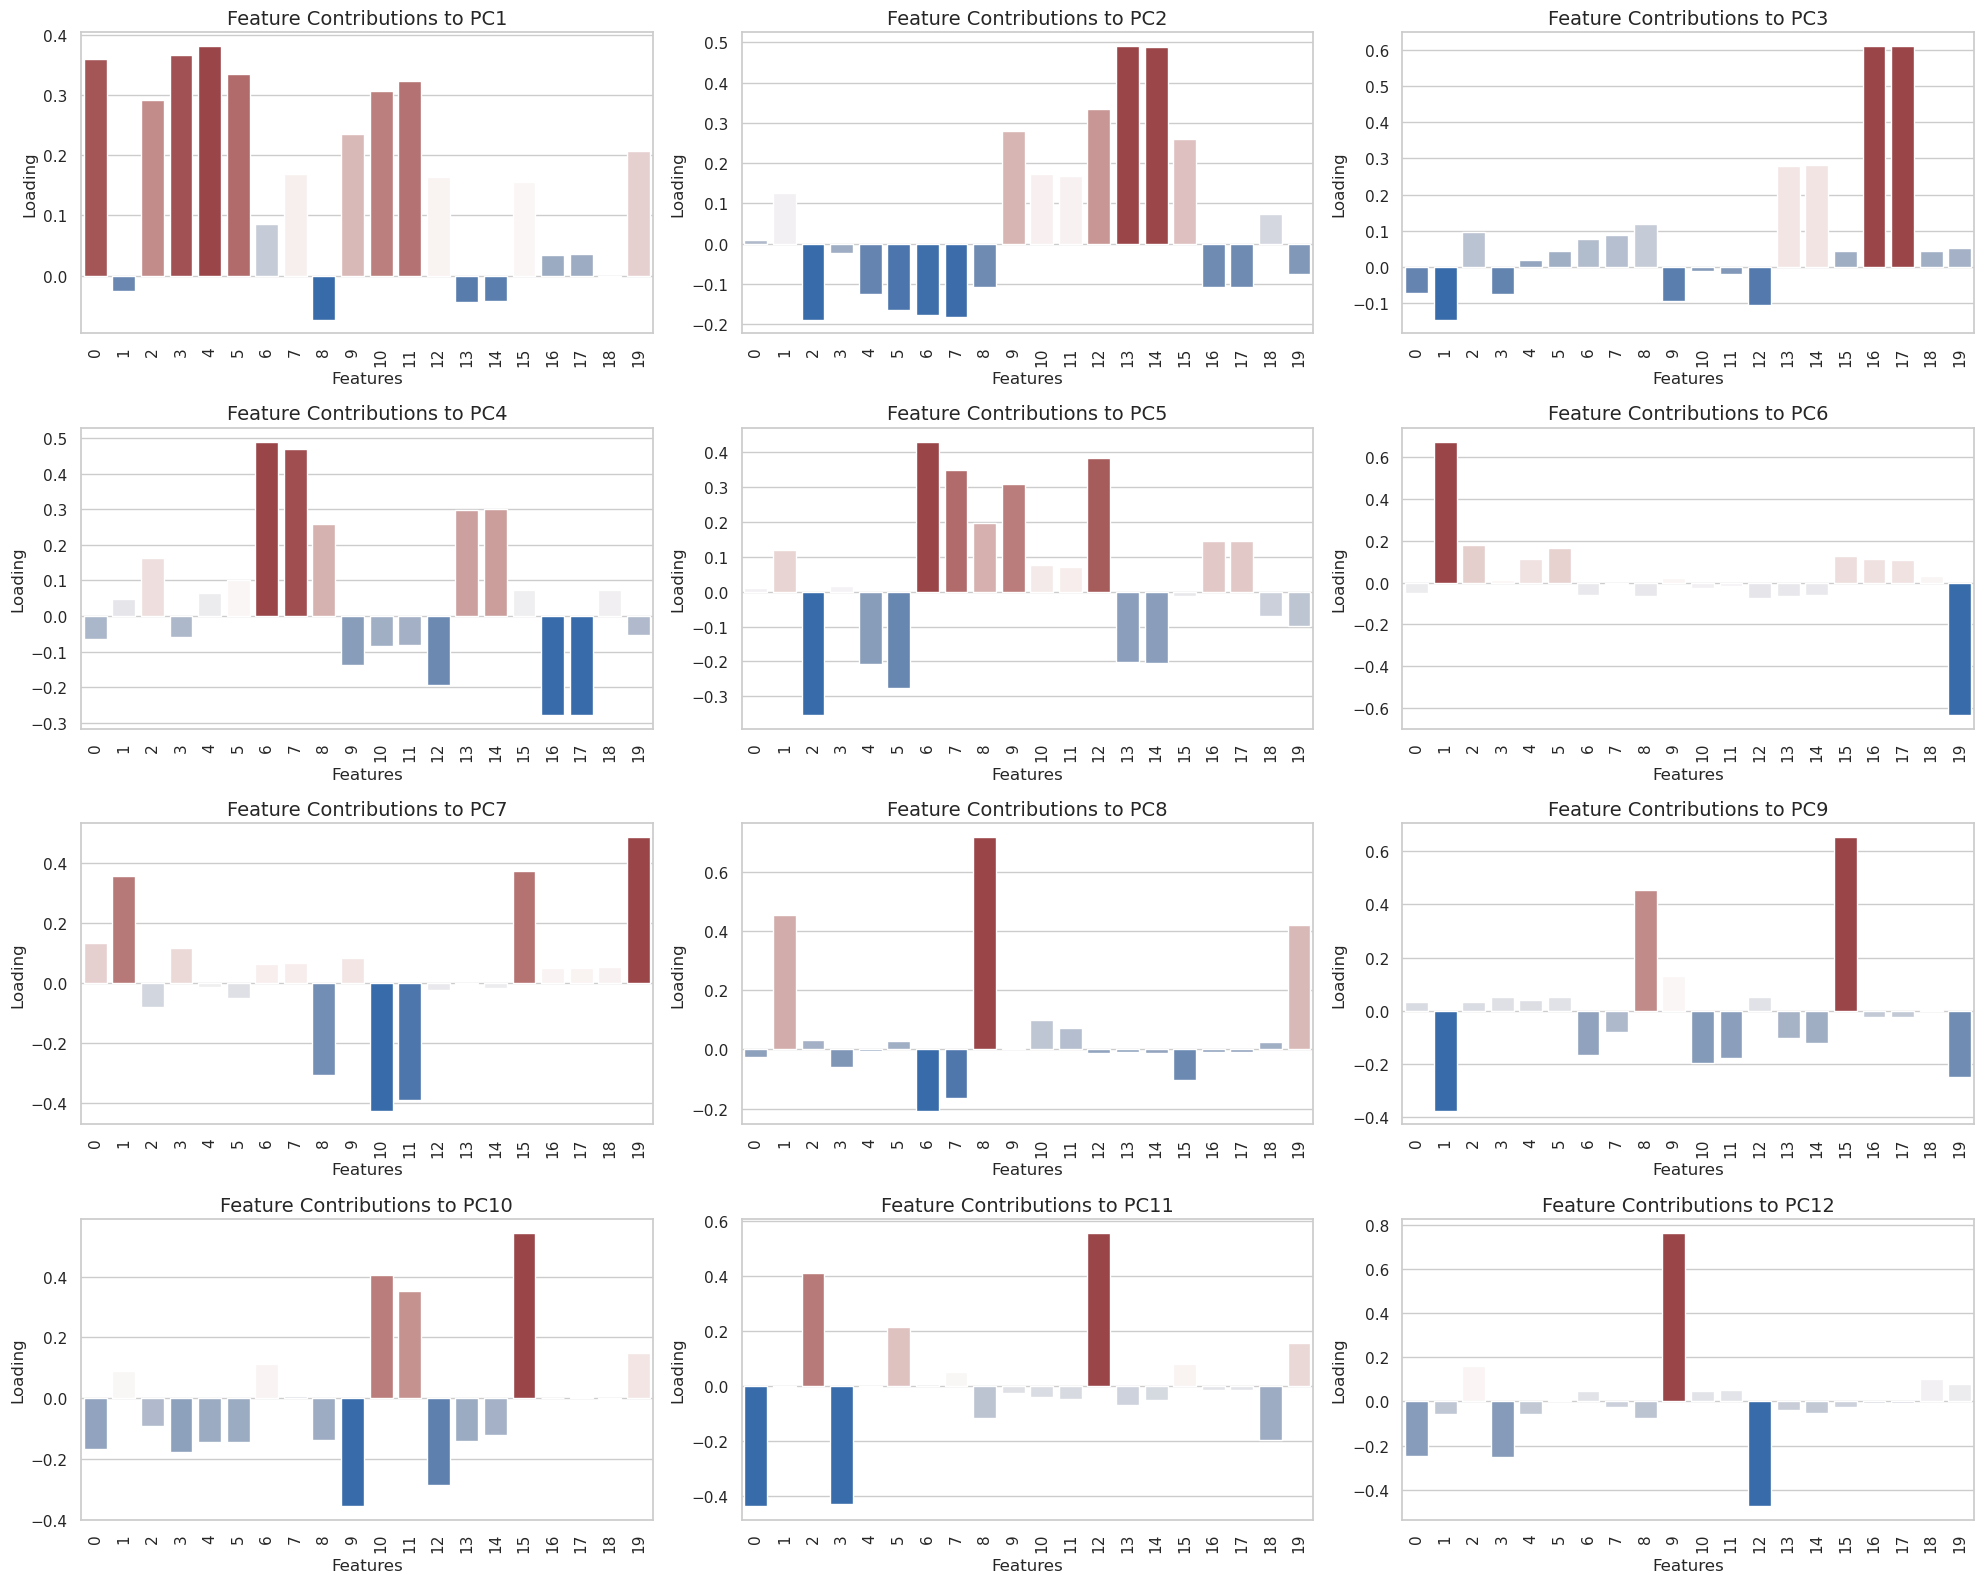

In [15]:
# Set up the plot style
sns.set(style="whitegrid")

fig, axes = plt.subplots(4, 3, figsize=(20, 16))
axes = axes.flatten()

# Loop through each principal component and plot feature contributions
for i, pc in enumerate(loadings_df.columns):
    sorted_indices = loadings_df[pc].abs().sort_values(ascending=False).index
    sns.barplot(
        x=loadings_df.index[sorted_indices],
        y=loadings_df[pc][sorted_indices],
        ax=axes[i],
        hue=loadings_df[pc][sorted_indices],
        palette="vlag",
        legend=False)
    axes[i].set_title(f'Feature Contributions to {pc}', fontsize=14)
    axes[i].set_xlabel('Features', fontsize=12)
    axes[i].set_ylabel('Loading', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

- Each principal component (PC) is a linear combination of the original features.
- The loadings are the coefficients of the features in these linear combinations.
- Loadings represent how much each original feature contributes to the direction represented by the principal component.

- Magnitude of Loadings:
    - The magnitude of a loading value (regardless of whether it is positive or negative) indicates how strongly that feature influences the corresponding principal component.
    - A larger magnitude means that the feature has a greater contribution to that principal component.

- Positive Loadings:
    - A positive loading indicates that the feature has a positive relationship with that principal component.
    - As the value of the principal component increases, the feature value tends to increase.
    - In simpler terms, features with positive loadings move in the same direction as the PC.
- Negative Loadings:
    - A negative loading indicates that the feature has a negative relationship with that principal component.
    - As the value of the principal component increases, the feature value tends to decrease.
    - Features with negative loadings move in the opposite direction compared to the PC.


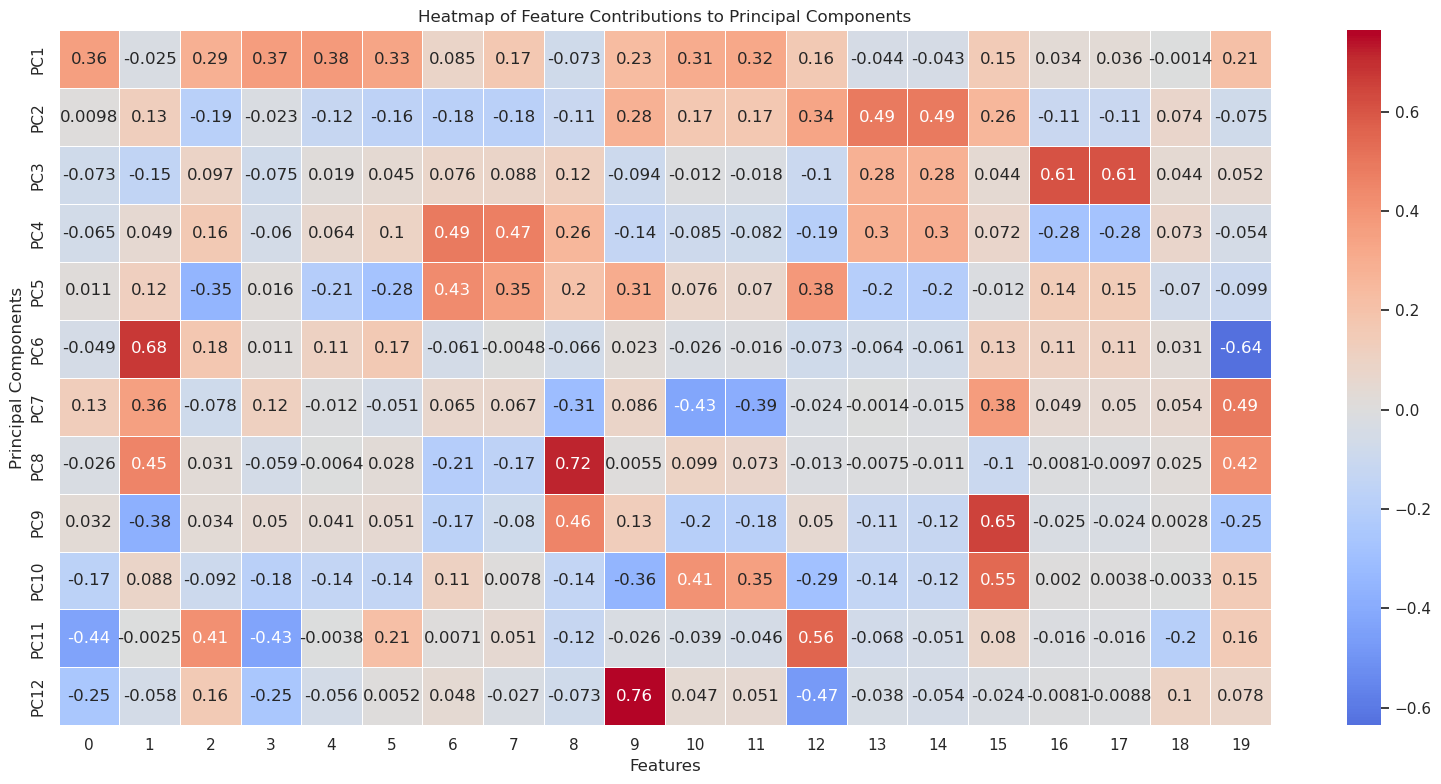

In [16]:
plt.figure(figsize=(16, 8))
sns.heatmap(loadings_df.transpose(), annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Heatmap of Feature Contributions to Principal Components')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
# A bit of data cleaning!
pca_df.drop(columns=['kmeans_cluster'], inplace=True)

In [19]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,sii
0,-2.465976,-1.736267,-0.465229,-0.641169,-0.815067,-2.343164,0.181438,0.771612,-0.503992,0.367563,0.908452,0.457135,2.0
1,-2.684300,0.033816,0.871330,0.155711,0.533141,-0.198057,-0.641191,-1.152948,-2.023262,-1.129488,-0.263219,-0.449435,0.0
2,-1.132362,0.347447,-0.276837,0.171416,0.445193,-0.896534,0.589757,1.366112,-0.763445,-1.764644,-0.516718,0.384314,0.0
3,-0.658203,-0.157020,-1.730633,-0.089483,0.529921,0.565280,-1.298837,0.920752,0.264113,-0.478544,-0.312099,0.428134,1.0
4,0.524894,0.468503,0.125996,-0.367461,-1.652877,-0.004731,-0.775150,-1.170456,0.405546,-1.335652,-0.448668,-0.213398,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2728,-1.450580,0.111999,-0.084847,-0.346096,-1.018176,0.486642,2.209627,0.132117,-0.502316,1.341701,0.286670,-0.282923,0.0
2729,-3.136438,-0.721706,0.845232,-0.850990,-0.249379,-0.011918,-0.685677,-0.707303,-1.013233,-0.461523,-0.571327,-0.053403,1.0
2730,0.421586,0.982689,-1.137019,-0.656170,0.187264,-0.486303,0.641286,-0.922147,0.666214,0.311221,-0.265617,-0.329544,1.0
2731,0.566836,-0.034085,2.284600,0.512672,0.379221,1.410903,0.326785,0.196361,1.867486,0.405468,-0.746192,0.179740,1.0


Accuracy Score: 0.55

Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.83      0.73       315
         1.0       0.27      0.21      0.24       140
         2.0       0.38      0.14      0.20        86
         3.0       0.00      0.00      0.00         6

    accuracy                           0.55       547
   macro avg       0.32      0.30      0.29       547
weighted avg       0.50      0.55      0.51       547



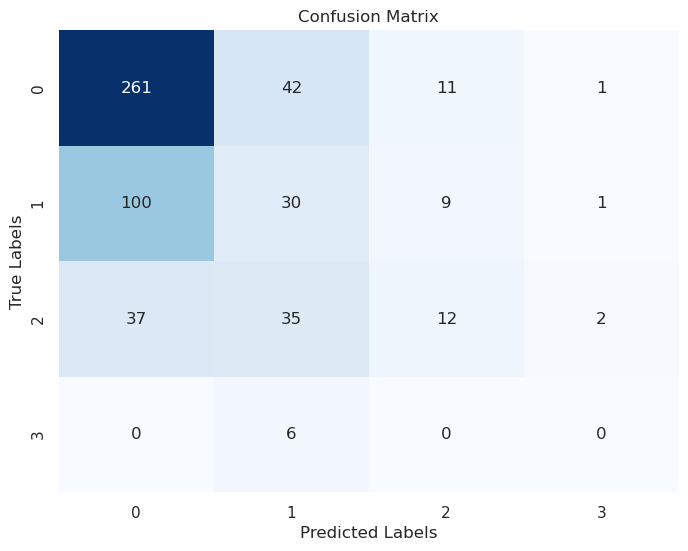

In [20]:
# Use the first 12 PCs and 'sii' as the target
X = pca_df.iloc[:, :12]
y = pca_df['sii']

# Train test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gbc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbc.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The model is biased towards class 0.0 due to class imbalance, performing reasonably well for it but poorly for other classes, particularly class 3.0. Addressing the imbalance and tuning the model could improve performance for the underrepresented classes.

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
X = pca_df.iloc[:, :12]
y = pca_df['sii']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', k_neighbors=10, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbc.fit(X_train_resampled, y_train_resampled)

y_pred = gbc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.52

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.67      0.70       315
         1.0       0.34      0.30      0.32       140
         2.0       0.27      0.30      0.28        86
         3.0       0.09      0.50      0.16         6

    accuracy                           0.52       547
   macro avg       0.36      0.44      0.36       547
weighted avg       0.54      0.52      0.53       547



In [25]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline

In [28]:
# Define the model and pipeline
classifier = GradientBoostingClassifier()
smote = SMOTE()
pipeline = Pipeline(steps=[('smote', smote), ('classifier', classifier)])

# Define parameter grid
param_grid = {
    'smote__sampling_strategy': ['auto', 'minority'],
    'smote__k_neighbors': [3, 4, 5, 6, 10]
}

# Perform grid search
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='f1_weighted',
    cv=5,
    verbose=1,
    n_jobs=2)
grid_search.fit(X_train, y_train)

# Display best parameters
print("Best SMOTE parameters:", grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best SMOTE parameters: {'smote__k_neighbors': 5, 'smote__sampling_strategy': 'minority'}


In [31]:
param_grid_gb = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.15],
    'classifier__max_depth': [3, 5, 7],
}

pipeline.set_params(smote__k_neighbors=5, smote__sampling_strategy='minority')

# Perform grid search for GradientBoostingClassifier
grid_search_gb = GridSearchCV(
    pipeline,
    param_grid_gb,
    scoring='f1_weighted',
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available processors
)
grid_search_gb.fit(X_train, y_train)

# Display best parameters
print("Best GradientBoosting parameters:", grid_search_gb.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best GradientBoosting parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 100}


In [32]:
grid_search_gb.best_estimator_

Pipeline(steps=[('smote', SMOTE(sampling_strategy='minority')),
                ('classifier', GradientBoostingClassifier(max_depth=7))])

In [33]:
# Best pipeline
best_pipeline = grid_search_gb.best_estimator_

# Predict and evaluate
y_pred = best_pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.81      0.72       315
         1.0       0.28      0.19      0.23       140
         2.0       0.38      0.16      0.23        86
         3.0       0.14      0.50      0.22         6

    accuracy                           0.54       547
   macro avg       0.36      0.42      0.35       547
weighted avg       0.51      0.54      0.51       547



In [37]:
from sklearn.ensemble import RandomForestClassifier

# Baseline Random Forest model
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)

# Evaluate on test set
y_pred_baseline = rf_baseline.predict(X_test)
print("Baseline Random Forest Results:")
print(classification_report(y_test, y_pred_baseline))


Baseline Random Forest Results:
              precision    recall  f1-score   support

         0.0       0.65      0.87      0.74       315
         1.0       0.29      0.20      0.24       140
         2.0       0.46      0.14      0.21        86
         3.0       0.00      0.00      0.00         6

    accuracy                           0.58       547
   macro avg       0.35      0.30      0.30       547
weighted avg       0.52      0.58      0.52       547



/mnt/home/khoshne1/.conda/envs/FDS_Project/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/home/khoshne1/.conda/envs/FDS_Project/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/home/khoshne1/.conda/envs/FDS_Project/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [41]:
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': [5, 10, 20, None],
    'classifier__class_weight': ['balanced', 'balanced_subsample'],
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 5, 10],
}

In [42]:
# Define Random Forest model and pipeline
rf_classifier = RandomForestClassifier(random_state=42)
smote = SMOTE(sampling_strategy='minority', k_neighbors=5)  # Use the best SMOTE params
pipeline = Pipeline(steps=[('smote', smote), ('classifier', rf_classifier)])

# Perform grid search
grid_search_rf = GridSearchCV(
    pipeline,
    param_grid_rf,
    scoring='f1_weighted',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search_rf.fit(X_train, y_train)
print("Best Random Forest parameters:", grid_search_rf.best_params_)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
Best Random Forest parameters: {'classifier__class_weight': 'balanced_subsample', 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}


In [40]:
# Best pipeline
best_rf_pipeline = grid_search_rf.best_estimator_

# Predict and evaluate
y_pred_rf = best_rf_pipeline.predict(X_test)

# Classification report
print("Tuned Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

Tuned Random Forest Results:
              precision    recall  f1-score   support

         0.0       0.67      0.80      0.73       315
         1.0       0.34      0.25      0.29       140
         2.0       0.35      0.15      0.21        86
         3.0       0.12      0.67      0.21         6

    accuracy                           0.56       547
   macro avg       0.37      0.47      0.36       547
weighted avg       0.53      0.56      0.53       547

